In [1]:
# （必須）モジュールのインポート
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except:
    pass

In [1]:
# （必須）カレントディレクトリの変更（自分の作業フォルダのパスをコピーして入力する）
os.chdir(r'/Users/narizuka/work/document/lecture/rissho/sport_programming/sport_data')

# プログラミング環境の構築

## Anacondaのインストール

既に「プログラミング基礎」の授業内でAnacondaをインストールしているはずなので，以下ではインストールの概要だけ述べる．詳細は[Python.jp](https://www.python.jp/install/anaconda/windows/install.html)や[Let'sプログラミング](https://www.javadrive.jp/python/install/index5.html)などが参考になる．

- [Anacondaの公式サイト](https://www.anaconda.com/products/individual)にアクセスする
- 下にスクロールし，"Anaconda Installers"から環境に応じたインストーラをダウンロードする
- ダウンロードしたインストーラをクリックし，画面の指示に従う
    - 途中で，`add Anaconda to the system Pass environment variable`にチェックを入れてPathの設定を行う
- Anaconda Navigatorが使えるか確認する

## Maplotlibの日本語対応

Matplotlibはグラフ作成のためのライブラリである（詳しくは基礎編で解説する）．
Matplotlibは標準で日本語に対応していないので，ここでは日本語対応する方法を解説する．
日本語対応する方法には以下の2つが存在する（詳しくは[こちら](https://ai-inter1.com/matplotlib-japanize/)）：
    
    1. japanize_matplotlib を利用する
    2. MatplotlibのFontPropertiesを利用する

ここでは，1. japanize_matplotlibを利用する方法を説明する．
japanize_matplotlibはPythonのモジュールなので，最初にインストールしておけば，あとは他のモジュールと同じように`import japanize_matplotlib`とするだけで日本語が使用可能になる．
ただし，使用可能なフォントはIPAexゴシックだけなので，フォントにこだわりたい場合は2.の方法をおすすめする．

**japanize_matplotlibのインストール（詳しくは[こちら](https://pypi.org/project/japanize-matplotlib/)）**

- ターミナルを開いて以下のコマンドを実行し，AnacondaのインストールされているフォルダのPathを取得する
    ```
    conda info -e
    ---
    # conda environmentsL
    #
    base  * C:\Users\username\anaconda3
    ```
- 取得したAnaconda環境をactivateする
    - `base * `の右に表示された文字列（フォルダのパス）をコピーして以下を実行
    - `activate "フォルダのパス"`
    - これでanaconda環境にpipコマンドでインストール可能になる
- 以下のコマンドを実行してインストールする
    - `pip install japanize-matplotlib`

## 作業フォルダの作成

データ分析では，様々なファイルを扱わなければならない．
例えば，本講義では，Pythonのソースコード（`.py`ファイル），Jupyter NoteBook（`.ipynb`ファイル），データ（`.csv`ファイル），図（`.pdf`ファイル）などのファイルを扱うことになる．
これらのファイルが自分のPC内のどこに保存されているかを把握しておかないと，ファイルを探すだけで時間を取られてしまい，時間の無駄である．
データ分析を始める際にまず行うべきことは，PC内のフォルダやファイルを整理することである．

まず本講義専用の作業フォルダを作成する（名前は自分で分かれば何でも良い）．
作業フォルダの作成場所はできればOneDriveやGoogle Driveの中に作ることを推奨する（こうすれば，自動的にクラウド上にバックアップされる）．

ここでは，[ローカルディスク（C:）][ユーザー][username][OneDrive]の中に[sport_data]という作業フォルダを作ったとする：
```
[OneDrive]
    - [デスクトップ]
    - [ドキュメント]
    ...
    - [sport_data]

```

本講義で扱うファイルは全てこの[sport_data]の中に保存する．
[sport_data]フォルダの中身は次のように章ごとのサブフォルダやレポート用のフォルダに分けておくと良い：
```
[sport_data]
    - [1_introduction]
    - [2_environment]
        - 2_environment.ipynb
    - [3_numpy]
    - [4_pandas]
    - [5_matplotlib]
    - [6_event]
    - [7_tracking]
    - [report]
    - [others]
```
例えば，[2_environment]というフォルダの中には，".ipynb"ファイル（このページの上部からダウンロード可）が保存されている．

## パス（Path）について

### パスとは何か？
Pythonプログラムの実行，自分のPC上のファイルの読み込み，加工したデータの保存を行うには，対象となるファイルの在り処，つまりアドレスが分からないといけない．
このアドレスを指定する文字列のことをパス（Path）と呼ぶ．

パスはフォルダの階層構造を区切り文字によって区切った形式で表される．
細かい表記方法はWindowsやMacなどのOSによって異なるが，Windowsの場合は以下のように表される：
```
C:¥Program Files
C:¥Users¥username¥work¥test.txt
G:¥マイドライブ
```

ここで，それぞれのパスの先頭には"C"や"G"などの文字が付いている．
これは，最も上の階層であるドライブ名を表す文字で，エクスプローラーを開いてナビゲーションウィンドウからPCアイコンをクリックすると表示される［例えば，"C"はCドライブを意味し，ローカルディスク（C:）と表示されているものに対応する］．
また，フォルダの階層の区切りは"¥"（またはバックスラッシュ"\\"）によって表されており，"¥"の隣にはフォルダの名前が記載されている．
例えば，１番目のパスは，Cドライブの中にある"Program Files"というフォルダのパスを表す．
また，2番目のパスは"test.txt"というファイルのパスを表す．
3番目は先頭の文字が"G"となっているが，これはGoogle Driveのパスを表している．

### パスの取得方法

Windowsでは，パスをコピーしたいファイルやフォルダに対し，shiftキーを押しながら右クリックし「パスのコピー」を選択すればよい．

### WindowsのPythonでパスを指定する際の注意

Windows環境においてパスをコピーして貼り付けると
``
"C:\Users\username\OneDrive\sport_data"
``
のように区切り文字がバックスラッシュ"\\"または"¥"になるはずである．
ところが，pythonではバックスラッシュ"\\"と文字を組み合わせたエスケープシーケンスいう特別な文字列が存在し，例えば，"\n"は改行，"\t"はタブを表すエスケープシーケンスである．
これにより，上の例の中にある"\t"の部分はパスの区切りではなくエスケープシーケンスとして認識され，エラーが出ることがある（特に，pythonでファイルの入出力を行うとき）．

これを回避するには以下の方法がある：
1. ［推奨］r"C:\Users\username\OneDrive\sport_data"とする（raw文字列）
2. バックスラッシュ"\\"をスラッシュ"/"に書き換える
3. バックスラッシュ"\\"を"\\\\"に書き換える

In [2]:
# エラーが出る
print("C:\Users\username\OneDrive\sport_data")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1572705885.py, line 2)

In [3]:
# raw文字列
print(r"C:\Users\username\OneDrive\sport_data")

C:\Users\username\OneDrive\sport_data


In [4]:
# \ -> /
print("C:/Users/username/OneDrive/sport_data")

C:/Users/username/OneDrive/sport_data


In [5]:
# \ -> \\
print("C:\\Users\\username\\OneDrive\\sport_data")

C:\Users\username\OneDrive\sport_data


### 絶対パスと相対パス
まず，以下のようなプログラムをPythonスクリプト（test.py）に保存する（[ダウンロードはこちら](https://drive.google.com/uc?export=download&id=1htV_JZw26qMvnefhc1YGZfhZCiYMojmk)）．

```python
for i in range(5):
    print("test%s" % i)
```

ここでは，Pythonスクリプトファイルのパス（保存先）が`"C:\Users\username\OneDrive\sport_data\2_environment\test.py"`であるとする．
これを実行するには以下の方法がある：

1. ipythonまたはJupyterで実行する
    - `%run "ファイルのパス"`

2. ターミナル（またはコマンドプロンプト）で実行する
    - `python "ファイルのパス"`

このとき，ファイルのパスを指定する方法には以下の2通りが存在する．

**1. 絶対パス**

```python
%run "C:\Users\parar\OneDrive\sport_data\2_environment\test.py"
```

この方法では，最も上の階層であるドライブ名（ここではCドライブ）から始まるパスを指定しており，これを**絶対パス**と呼ぶ．
「パスのコピー」によって取得されるのはこの絶対パスである．
よって，絶対パスを使っておけばエラーは出にくいが，PCの奥深くにあるフォルダだとパスが長くなるという問題がある．

**2.相対パス**

```python
os.chdir(r"C:\Users\parar\OneDrive\sport_data") # カレントディレクトリの移動
%run "./2_environment/test.py"             # 実行
```

2つ目の方法では，まず`os.chdir`コマンドで`"C:/Users/username/OneDrive/sport_data"`という作業フォルダに移動してから，さらに"./2_environment/test.py"を実行している．
このとき，現在の居場所（今の場合は[sport_data]フォルダ）のことをカレントディレクトリと呼ぶ．
また，スクリプトファイルのパスは"./2_environment/test.py"のように指定されるが，これを**相対パス**と呼ぶ．
相対パスは，カレントディレクトリからの相対的な位置関係を表しており，"."というのがカレントディレクトリのパスを表す省略記号である．
相対パスを用いると，パスが短くなるので便利であるが，カレントディレクトリがどこなのかを認識しておく必要がある．

## Jupyter Lab

Anacondaをインストールすると，自動的にJupyter NotebookとJupyter Labが使えるようになる．
本講義ではJupyter Labの方を用いる．

### Jupyter Labの起動方法

1. ターミナル（またはコマンドプロンプト）から起動
    - 次のコマンドを実行：`jupyter lab "起動ディレクトリのパス"`
    - 起動ディレクトリのパスは省略可（デフォルトでは"C:/Users/username"）
    
2. Anaconda Navigatorから起動
    - ［スタートメニュー］→［Anaconda Navigator (anaconda3)］
    - ［Jupyter Lab］をクリック
- 初期状態ではLauncherが起動するので，NotebookからPython 3を選択する

### .ipynbファイルの起動方法

- .ipynbファイルをダウンロードし，作業フォルダに保存する．
    - 講義ノート冒頭のDLリンクをクリックし，ダウンロードアイコンをクリック
    - 自動保存された場合は[ダウンロード]フォルダ内に保存されているはず
- Jupyter Labを起動し，左上のフォルダアイコンをクリックする．
- .ipynbファイルを保存した作業フォルダに移動し，.ipynbファイルをダブルクリックする．

### Jupyter Labの運用方法

Jupyter Labで作業する際には，以下の手順でカレントディレクトリを作業フォルダに変更しておくと良い：
1. エクスプローラー上で，作業フォルダをshiftを押しながら右クリックし，パスのコピーを選択
2. コピーしたパスの先頭に`r`を付けて`os.chdir(r"作業フォルダのパス")`のように実行

In [7]:
import os
os.chdir(r'/Users/narizuka/work/document/lecture/rissho/sport_programming/sport_data')

これにより，[sport_data]内部のフォルダには相対パスでアクセスすることができるようになる．
例えば，Matplotlibで作成した図を[sport_data][2_environment]に保存したい場合は以下のようにする．
japanize_matplotlibがうまくインストールされていれば，ラベルに日本語が表示されるはずである．

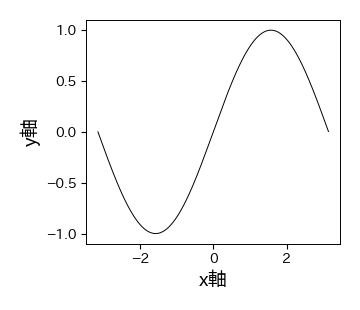

In [8]:
import numpy as np
import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except:
    pass

fig, ax = plt.subplots(figsize=(3.5, 3))
x = np.arange(-np.pi, np.pi, 0.01)
ax.plot(x, np.sin(x))

ax.set_xlabel('x軸', fontsize=14)
ax.set_ylabel('y軸', fontsize=14)

fig.savefig('./2_environment/graph.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

**JupyterとPythonスクリプトの使い分け**

 Jupyterは短いコードを逐次実行しながら結果を確認するのには適しているが，コードが長くなると分かりにくくなる．そこで，コードが長くなってきたら関数やクラスに適宜まとめてスクリプト（`.py`ファイル）に保存すると良い．保存したスクリプトはNumPyやPandasと同じようにimportできるので，Jupyter上ではimportしたスクリプト内の関数を実行するだけにすると結果が整理しやすい．その際，以下に説明する自作モジュールの自動リロードの設定をしておくと便利である．
 
※ ローカル環境で`.py`ファイルを編集するにはエディタを使用する．Windowsに標準搭載されているメモ帳を使うのが最も手軽だが，非常に使いづらいので推奨しない．まずは自分の好みに合うエディタを探すことを推奨する．よく使われるエディタは以下の通り：
- Visual Studio Code
- Atom
- Sublime Text

### （参考）便利な機能

**Jupyterのconfigファイル**
- ターミナルで以下を実行する
    - `jupyter notebook --generate-config`
    - "C:\Users\username\\.jupyter"の中に"jupyter_notebook_config.py"というファイルができる．
- "jupyter_notebook_config.py"を開いて以下を追加
    - `c=get_config()`
    - `c.NotebookApp.notebook_dir="起動ディレクトリのパス"`
- これにより，Jupyter Labを起動したときに指定したフォルダが開かれる

**Ipythonのプロファイル**

Ipythonプロファイルを作成すると，jupyterの起動時に自動実行したいコマンドを設定できる．

- ターミナルで以下を実行する
    - `ipython profile create profile_name`
    - "C:\Users\username\.ipython\prifile_name"に"startup"フォルダが作成される．
- startupフォルダの中に"00.ipy"というファイル（スタートアップスクリプト）を作り，自動実行したいコマンドを記述する．
- 例えば，以下はよく使うので自動importしておくと良い

    ```python
    import os
    import sys
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    ```
- 自作のモジュール（例えば`my_module.py`）をimportして使う場合，`my_module.py`を一度jupyterでimportした後に，ローカルで`my_module.py`を変更することがよくある．このとき，ローカルで行った変更内容はjupyter側には自動で反映されない．そこで，スタートアップスクリプトに以下を加えておくと自作モジュールの変更が自動で反映される．
  
    ```
    %load_ext autoreload
    %autoreload 2
    %matplotlib inline
    ```

例として，[sport_data]フォルダの中に[module]フォルダを作り，以下のプログラムを`my_module.py`として保存する．

```python
def my_func():
    for i in range(5):
        print("test%s" % i)

if __name__ == '__main__':
    my_func()
```
つまり，このPythonスクリプトのパスは"C:\Users\username\OneDrive\sport_data\module\my_module.py"となる．

これを単にPythonスクリプトとして実行すると，`if __name__ == '__main__':`以下のコマンドが実行される：

```python
%run "./module/my_module.py"
```

一方，これをモジュールとしてインポートするには以下のようにする：

```python
import module.my_module as mm
```

この状態で`my_module`内の関数`my_func()`を以下のように`mm.my_func()`として実行できる：

```python
mm.my_func()
```

スタートアップスクリプト内にautoreloadの設定を書いている場合は，ローカルで`my_module.py`を書き換えたら即座に変更内容が反映されるはずである．

```python
mm.my_func()
```

## （参考）Windows Terminalのインストール

プログラミングをする上でコマンドによる操作は避けて通れない．
Windowsにはコマンドプロンプトというコマンドラインツールが搭載されているが，使いづらいのでWindows Terminalをインストールすることを推奨する．
（コマンドプロンプトでも可）

**インストール**
- Windosw10の場合はMicrosoft Storeからインストールできる．
- Windows11の場合は標準搭載されている．

**設定**
- 左下の検索をクリックし，"ターミナル"と検索
- 検索結果の中から"ターミナル"を右クリックし"管理者として実行"
- 以下のコマンドを実行
  ```
  Set-ExecutionPolicy RemoteSigned
  ```

**実行**
- タスクバーにピン留めしておいて，そこから実行すると良い

## （参考）Google Colab

Google Colab（正式名称はGoogle Colaboratoty）はgoogleが提供するPython実行環境であり，Jupyter Notebookがベースになっている．
実際，Google Colabで作成したノートブックは".ipynb形式"で保存されるので，相互互換性がある．
Google Colabの特徴は以下の通りである：

- ブラウザ上で動作する
- 基本操作はJupyter Notebookと似ている（細かい操作方法は異なる）
- 作成したノートブックはGoogle Drive上に保存される
    - Google Driveが必要（なのでGoogle アカウントも必要）
- pythonの環境構築が不要（新たにモジュールをインストールすることも可能）
- 無料でGPUを使用可能

特に，Jupyter Notebookの場合は自分のPC上にpython環境を構築する必要があるが，Google Colabはその必要がない点がメリットである．
また，GPUが無料で使用可能なので，重い計算を行う際にも重宝する．
本講義では，基本的にJupyter Labを用いるが，Google Colabを用いても問題ない．

### Google colabでjupyter notebookを開く

- Google Driveを開いて作業フォルダに移動
- 既存の`.ipynbファイル`を選択するとGoogle Colabが開く
- 新規作成作成の場合は以下
    - ［右クリック］→［その他］→［Google Colaboratory］

### 必要なモジュールをimportする

- google colabにインストールされていないモジュール（japanize_matplotlibなど）

    ```python
    !pip install japanize-matplotlib
    import japanize_matplotlib
    ```
- 既にインストールされているモジュール

    ```python
    import numpy as np
    ```

### Google Driveをマウントする

Google Driveに保存した自作モジュールやファイルにアクセスしたい場合はGoogle Driveをマウントする必要がある．

- 以下を実行する
  
    ```python
    from google.colab import drive
    drive.mount('/content/drive')
    ```
- 「このノートブックにGoogleドライブのファイルへのアクセスを許可しますか？」と聞かれるので「Google ドライブに接続」を選択
- 自分のGoogleアカウントを選択し，「許可」を選択

### （任意）自作モジュールをimportする

```python
import sys
sys.path.append('/content/drive/My Drive/***')

import ***.xxx
```
※ なお，自作モジュールの変更を反映したい場合は［ランタイムを出荷時設定にリセット］し，再度マウントする

### （任意）matplotlibのスタイルファイルを読み込む

```python
import matplotlib.pyplot as plt
plt.style.use('/content/drive/My Drive/***/matplotlibrc')
```